# Importando Bibliotecas e Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import pickle
import shap
from tensorflow import keras

In [23]:
dados = pd.read_csv('dados.csv')

X = dados.drop('EVOLUCAO', axis=1)
y = dados['EVOLUCAO']

undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)

scaler = MinMaxScaler()
#X_train['NU_IDADE_N'] = scaler.fit_transform(X_train['NU_IDADE_N'].values.reshape(-1,1))
#X_test['NU_IDADE_N'] = scaler.transform(X_test['NU_IDADE_N'].values.reshape(-1,1))

c:\Users\hevan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hevan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hevan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hevan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

# Importando Modelos

## Regressão Logística

In [4]:
reg_log = pickle.load(open('modelos/logReg_model.sav', 'rb'))

In [5]:
features_reg_log = pd.DataFrame()
features_reg_log['term'] = reg_log.feature_names_in_
features_reg_log['coef'] = reg_log.coef_[0]
features_reg_log = features_reg_log.sort_values(by='coef', ascending=False).reset_index(drop=True)
features_reg_log

,term,coef
0,NU_IDADE_N,3.355283
1,SUPORT_VEN_1,2.081581
2,IMUNODEPRE_1,0.802361
3,UTI_1,0.747820
4,HEPATICA_1,0.720034
5,RENAL_1,0.456837
6,NEUROLOGIC_1,0.414687
7,HEMATOLOGI_1,0.358940
8,CS_RACA_3,0.343455
9,DISPNEIA_1,0.307761


In [22]:
scaler.inverse_transform(X_test)

c:\Users\hevan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hevan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hevan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([[ 75.,  18.,  18., ...,  18.,  18.,  18.],
       [ 76.,  18., 118., ..., 118.,  18.,  18.],
       [ 82.,  18.,  18., ..., 118.,  18.,  18.],
       ...,
       [ 86., 118.,  18., ..., 118.,  18.,  18.],
       [ 62.,  18.,  18., ...,  18.,  18.,  18.],
       [ 73.,  18., 118., ...,  18.,  18.,  18.]])

In [26]:
print(y_test.iloc[0])

1


In [5]:
# Calculando os valores SHAP para as variáveis
explainer_reg_log = shap.Explainer(reg_log, X_train)
shap_values_reg_log = explainer_reg_log(X_test)

# Obtendo a importância das variáveis
mean_abs_shap_values_reg_log = np.abs(shap_values_reg_log.values).mean(axis=0)
sorted_indices_reg_log = np.argsort(mean_abs_shap_values_reg_log)[::-1]

# Dados das importâncias das variáveis
importancias_reg_log = {
    "Variável": [X_train.columns[i] for i in sorted_indices_reg_log],
    "Importância SHAP": [mean_abs_shap_values_reg_log[i] for i in sorted_indices_reg_log]
}

# Criando o DataFrame
importancias_reg_log = pd.DataFrame(importancias_reg_log)
importancias_reg_log.head()

,Variável,Importância SHAP
0,SUPORT_VEN_1,0.714738
1,NU_IDADE_N,0.513082
2,UTI_1,0.337928
3,TOSSE_1,0.196873
4,GARGANTA_1,0.145346


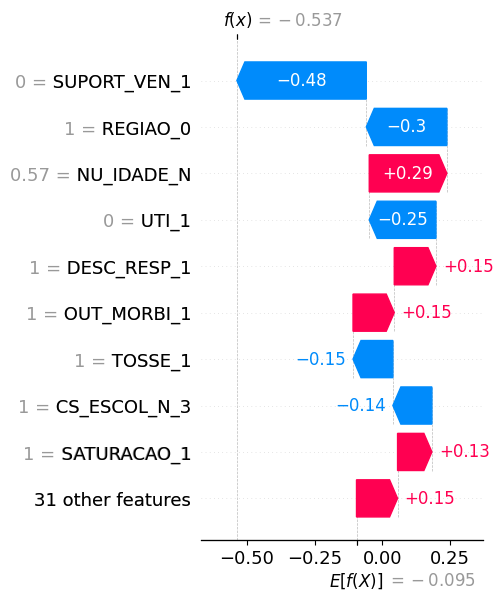

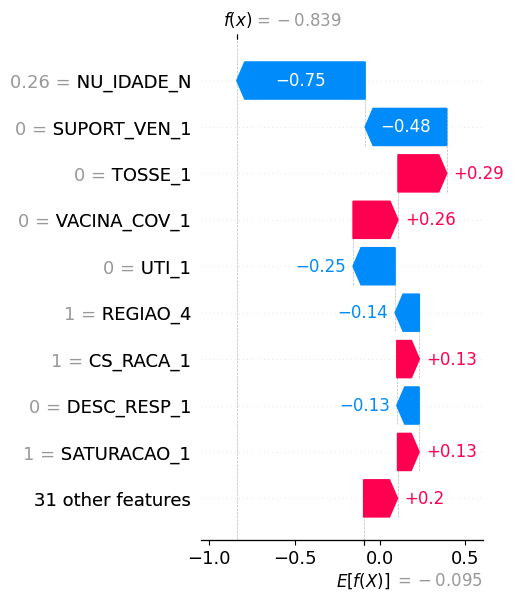

<Figure size 640x480 with 0 Axes>

In [6]:
# Criação dos gráficos
plt.figure(figsize=(10, 4))  # Tamanho da figura

# Gráfico 1 à esquerda
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
shap.plots.waterfall(shap_values_reg_log[0])

# Gráfico 2 à direita
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
shap.plots.waterfall(shap_values_reg_log[1])

plt.tight_layout()  # Ajusta o espaçamento entre os gráficos
plt.show()

In [11]:
def shap_diagrams(shap_values_reg_log, index=0):
    fig, (ax0, ax1) = plt.subplots(1, 2)
    plt.sca(ax0)

    shap.plots.waterfall(shap_values_reg_log[index], show=False)
    ax0.set_title("SHAP Waterfall Plot")

    shap.plots.waterfall(shap_values_reg_log, ax=ax1, show=False)
    ax1.set_title("SHAP Waterfall Plot", pad=25)

    # to horizontally separate the two axes
    plt.subplots_adjust(wspace=1)
    # because waterfall seems to update the figsize
    fig.set_size_inches(10, 3)

    plt.show()

shap_diagrams(shap_values_reg_log, 2)

TypeError: waterfall() got an unexpected keyword argument 'ax'

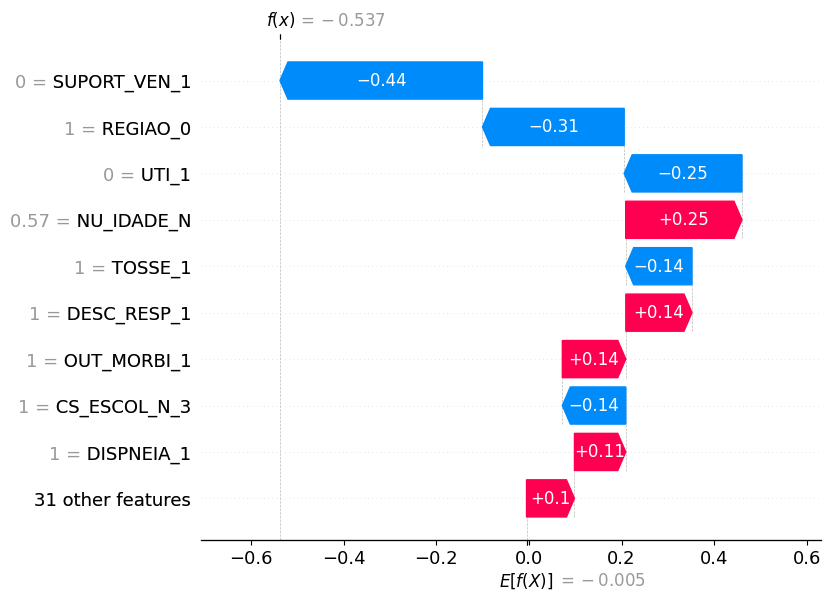

In [6]:
shap.plots.waterfall(shap_values_reg_log[0])

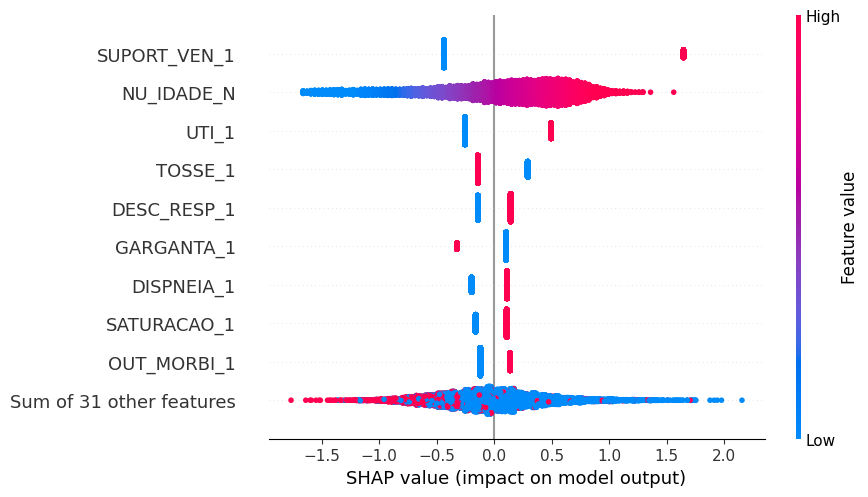

In [7]:
shap.plots.beeswarm(shap_values_reg_log)

C:\Users\hevan\AppData\Local\Temp\ipykernel_21384\1946511265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importancias_reg_log2['Variável'] = ['Sup. Ventilatório','Idade','UTI','Tosse','Desc. Respiratório']


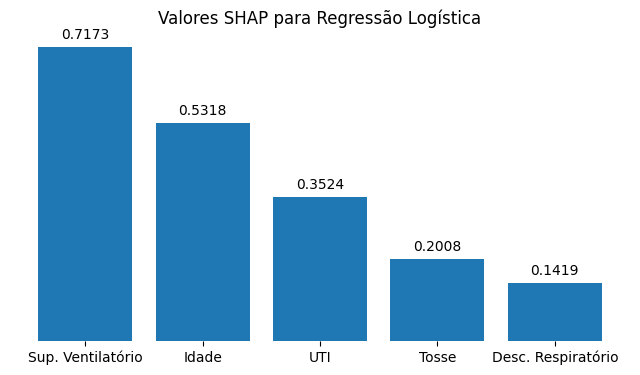

In [17]:
importancias_reg_log2 = importancias_reg_log.iloc[:5,:]
importancias_reg_log2['Variável'] = ['Sup. Ventilatório','Idade','UTI','Tosse','Desc. Respiratório']

plt.figure(figsize=(8,4))
plt.title('Valores SHAP para Regressão Logística')
plt.bar(importancias_reg_log2['Variável'], importancias_reg_log2['Importância SHAP'])
plt.yticks([])

# Adicionar os valores em cima de cada barra
for i in range(importancias_reg_log2.shape[0]):
    plt.text(i, importancias_reg_log2['Importância SHAP'][i] + 0.02, str(importancias_reg_log2['Importância SHAP'][i].round(4)), ha='center')

# Remove all spines from the plot
sns.despine(left=True, bottom=True, right=True, top=True);

### Exhaustive Feature Selection (EFS)

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [19]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=20)
fit = test.fit(X_train, y_train)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X_train)
# Summarize selected features
print(features)

[1.104e+02 5.666e+01 1.267e+01 1.333e-01 2.093e-01 6.078e+01 1.307e+02
 1.025e+02 2.259e+01 2.053e+01 1.014e+02 4.107e+02 3.758e+02 4.623e+02
 5.695e+02 3.882e+00 2.508e+01 5.440e+01 8.267e+01 1.318e+02 1.681e+01
 7.616e+01 2.562e+01 8.565e+01 1.271e+02 9.938e+01 1.201e+02 1.957e+02
 2.019e+00 1.503e+02 1.893e+03 3.545e+03 1.913e+01 3.002e+01 4.624e+01
 8.511e+00 1.104e+02 4.313e+01 2.603e+01 2.645e+01]
[[0.17 0.   1.   ... 0.   0.   0.  ]
 [0.57 0.   0.   ... 0.   0.   0.  ]
 [0.72 0.   0.   ... 0.   0.   0.  ]
 ...
 [0.32 0.   1.   ... 1.   0.   0.  ]
 [0.34 0.   0.   ... 1.   1.   1.  ]
 [0.74 0.   1.   ... 0.   0.   0.  ]]


c:\Users\hevan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hevan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hevan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hevan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

## Floresta Aleatória

In [20]:
rf = pickle.load(open('modelos/rf_model.sav', 'rb'))

In [21]:
features_rf = pd.DataFrame()
features_rf['term'] = rf.feature_names_in_
features_rf['coef'] = rf.feature_importances_
features_rf = features_rf.sort_values(by='coef', ascending=False).reset_index(drop=True)
features_rf.head()

,term,coef
0,SUPORT_VEN_1,0.288623
1,UTI_1,0.146592
2,NU_IDADE_N,0.145515
3,SATURACAO_1,0.060216
4,DISPNEIA_1,0.036076


In [22]:
explainer_rf = shap.TreeExplainer(rf, X_train)
shap_values_rf = explainer_rf.shap_values(X_test, check_additivity=False)

100%|===================| 23865/23884 [14:06<00:00]        

In [23]:
# Obtendo a importância das variáveis
mean_abs_shap_values_rf = np.abs(shap_values_rf[:,:,0]).mean(axis=0)
sorted_indices_rf = np.argsort(mean_abs_shap_values_rf)[::-1]

# Dados das importâncias das variáveis
importancias_rf = {
    "Variável": [X_train.columns[i] for i in sorted_indices_rf],
    "Importância SHAP": [mean_abs_shap_values_rf[i] for i in sorted_indices_rf]
}

# Criando o DataFrame
importancias_rf = pd.DataFrame(importancias_rf)
importancias_rf.head()

,Variável,Importância SHAP
0,SUPORT_VEN_1,0.096903
1,UTI_1,0.062937
2,NU_IDADE_N,0.047669
3,SATURACAO_1,0.031336
4,DISPNEIA_1,0.020639


C:\Users\hevan\AppData\Local\Temp\ipykernel_21384\2705450413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importancias_rf2['Variável'] = ['Sup. Ventilatório','UTI','Idade','Saturação de O2','Dispneia']


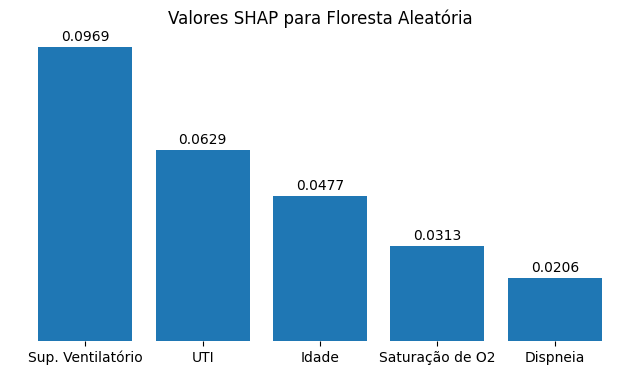

In [27]:
importancias_rf2 = importancias_rf.iloc[:5,:]
importancias_rf2['Variável'] = ['Sup. Ventilatório','UTI','Idade','Saturação de O2','Dispneia']

plt.figure(figsize=(8,4))
plt.title('Valores SHAP para Floresta Aleatória')
plt.bar(importancias_rf2['Variável'], importancias_rf2['Importância SHAP'])
plt.yticks([])

# Adicionar os valores em cima de cada barra
for i in range(importancias_rf2.shape[0]):
    plt.text(i, importancias_rf2['Importância SHAP'][i] + 0.002, str(importancias_rf2['Importância SHAP'][i].round(4)), ha='center')

# Remove all spines from the plot
sns.despine(left=True, bottom=True, right=True, top=True);

## Rede Neural

In [3]:
nn = pickle.load(open('modelos/nn_model.sav', 'rb'))

In [4]:
# Calculando os valores SHAP para as variáveis
explainer_nn = shap.Explainer(nn, X_train)
shap_values_nn = explainer_nn(X_test)

# Obtendo a importância das variáveis
mean_abs_shap_values_nn = np.abs(shap_values_nn.values).mean(axis=0)
sorted_indices_nn = np.argsort(mean_abs_shap_values_nn)[::-1]

# Dados das importâncias das variáveis
importancias_nn = {
    "Variável": [X_train.columns[i] for i in sorted_indices_nn],
    "Importância SHAP": [mean_abs_shap_values_nn[i] for i in sorted_indices_nn]
}

# Criando o DataFrame
importancias_nn = pd.DataFrame(importancias_nn)
importancias_nn.head()

PermutationExplainer explainer: 11943it [13:30, 14.52it/s]                           


,Variável,Importância SHAP
0,SUPORT_VEN_1,0.118799
1,NU_IDADE_N,0.089184
2,UTI_1,0.063147
3,REGIAO_0,0.030040
4,OUT_MORBI_1,0.029585


C:\Users\hevan\AppData\Local\Temp\ipykernel_496\4109331760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importancias_nn2['Variável'] = ['Sup. Ventilatório','Idade','UTI','Regiao Sul','Outra Comorbidade']


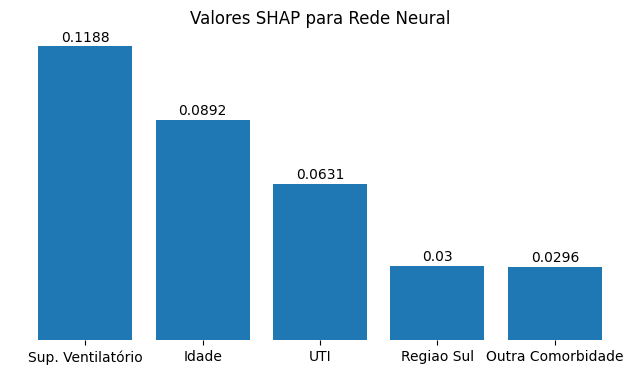

In [5]:
importancias_nn2 = importancias_nn.iloc[:5,:]
importancias_nn2['Variável'] = ['Sup. Ventilatório','Idade','UTI','Regiao Sul','Outra Comorbidade']

plt.figure(figsize=(8,4))
plt.title('Valores SHAP para Rede Neural')
plt.bar(importancias_nn2['Variável'], importancias_nn2['Importância SHAP'])
plt.yticks([])

# Adicionar os valores em cima de cada barra
for i in range(importancias_nn2.shape[0]):
    plt.text(i, importancias_nn2['Importância SHAP'][i] + 0.002, str(importancias_nn2['Importância SHAP'][i].round(4)), ha='center')

# Remove all spines from the plot
sns.despine(left=True, bottom=True, right=True, top=True);